✅ Loaded 81 valid dump files.


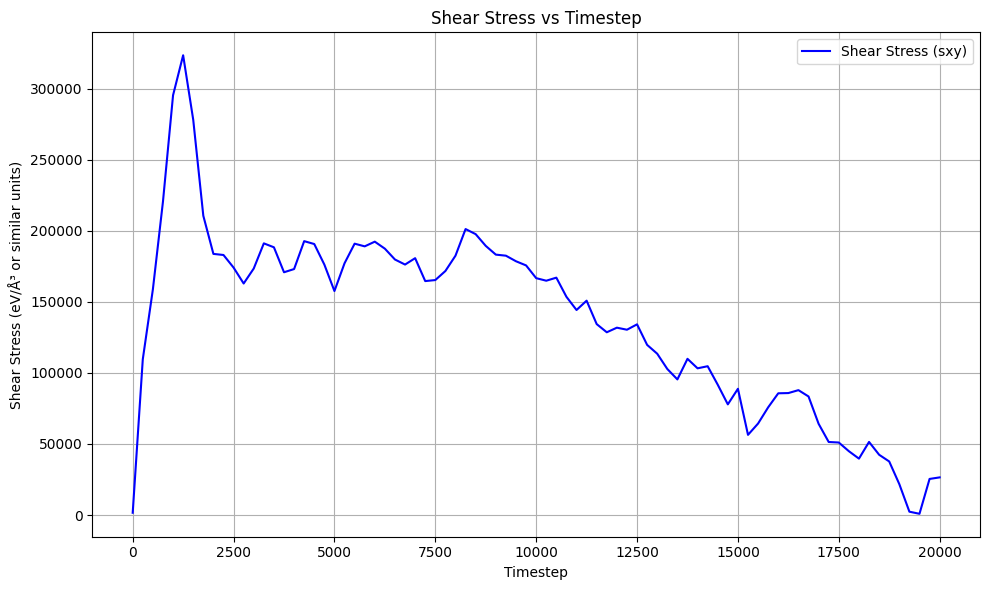

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# --------- Configuration ---------
folder = "."  # folder where dump files are present

# --------- Helpers ---------
def extract_timestep(filename):
    match = re.search(r'dump\.Al\.shear\.(\d+)', filename)
    return int(match.group(1)) if match else -1

# --------- File sorting ---------
dump_files = sorted(
    [f for f in os.listdir(folder) if f.startswith("dump.Al.shear.") and f.split(".")[-1].isdigit()],
    key=extract_timestep
)

# --------- Data loading ---------
timesteps = []
shear_stress = []

for fname in dump_files:
    timestep = extract_timestep(fname)
    with open(os.path.join(folder, fname)) as f:
        lines = f.readlines()

    # Find atom data section
    for i, line in enumerate(lines):
        if "ITEM: ATOMS" in line:
            start = i + 1
            break

    # Load sxy component = c_virial[4] = column 12 (0-based index)
    try:
        data = np.genfromtxt(lines[start:], usecols=12)  # column 13 in file, index 12 in Python
        if data.size > 0:
            sxy_avg = np.mean(data)
            timesteps.append(timestep)
            shear_stress.append(sxy_avg)
    except Exception as e:
        print(f"Skipping {fname} due to error: {e}")

print(f"✅ Loaded {len(timesteps)} valid dump files.")

# --------- Plotting ---------
plt.figure(figsize=(10, 6))
plt.plot(timesteps, shear_stress, color='blue', label='Shear Stress (sxy)')
plt.xlabel("Timestep")
plt.ylabel("Shear Stress (eV/Å³ or similar units)")
plt.title("Shear Stress vs Timestep")
plt.grid(True)
plt.legend()
plt.tight_layout()

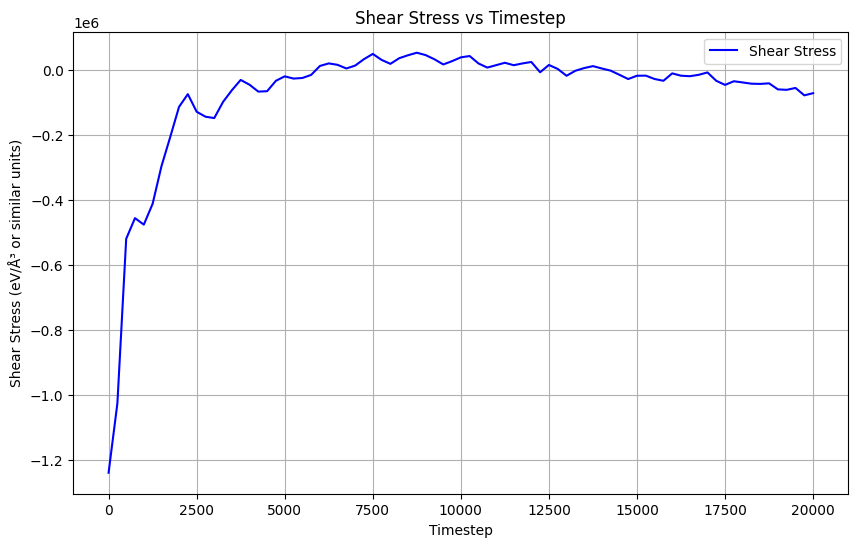

In [28]:
plt.figure(figsize=(10,6))
plt.plot(timesteps, shear_stress, label="Shear Stress", color='blue')
plt.xlabel("Timestep")
plt.ylabel("Shear Stress (eV/Å³ or similar units)")
plt.title("Shear Stress vs Timestep")
plt.grid(True)
plt.legend()
plt.savefig("shear_stress_vs_displacement.pdf", bbox_inches='tight')
plt.show()


In [23]:
timestep_size = 0.001  # ps
v_top = 1.0  # Å/ps
displacement = [t * timestep_size * v_top for t in timesteps]

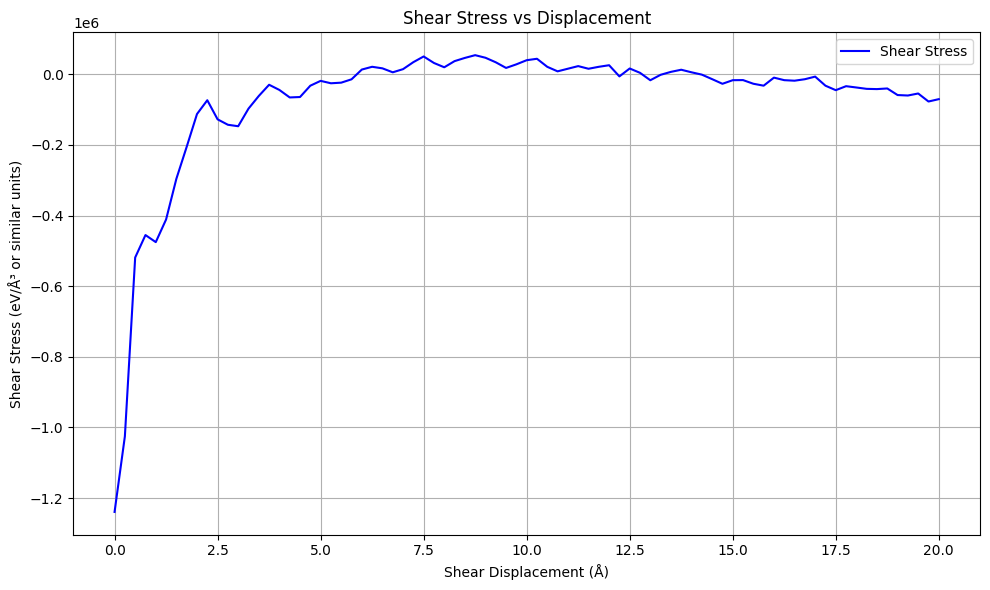

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(displacement, shear_stress, color='blue', label='Shear Stress')
plt.xlabel("Shear Displacement (Å)")
plt.ylabel("Shear Stress (eV/Å³ or similar units)")
plt.title("Shear Stress vs Displacement")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("shear_stress_vs_displacement.pdf", bbox_inches='tight')
plt.show()

In [12]:
from scipy.ndimage import uniform_filter1d
smooth_stress = uniform_filter1d(shear_stress, size=3)

plt.plot(displacement, smooth_stress, label='Smoothed Stress', color='red')

ModuleNotFoundError: No module named 'scipy'

In [13]:
!pip install scipy

   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.4 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.4 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.4 MB 9.6 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.4 MB 4.9 MB/s eta 0:00:08
   ---- ----------------------------------- 4.5/38.4 MB 4.9 MB/s eta 0:00:07
   ------ --------------------------------- 6.0/38.4 MB 5.4 MB/s eta 0:00:06
   -------- ------------------------------- 8.4/38.4 MB 6.7 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/38.4 MB 6.6 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/38.4 MB 6.6 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/38.4 MB 6.6 MB/s eta 0:00:05
   ------------ --------------------------- 12.1/38.4 MB 5.6 MB/s eta 0:00:05
   --------------- ------------------------ 14.7/38.4 MB 6.2 MB/s eta 0:00:04
   --------

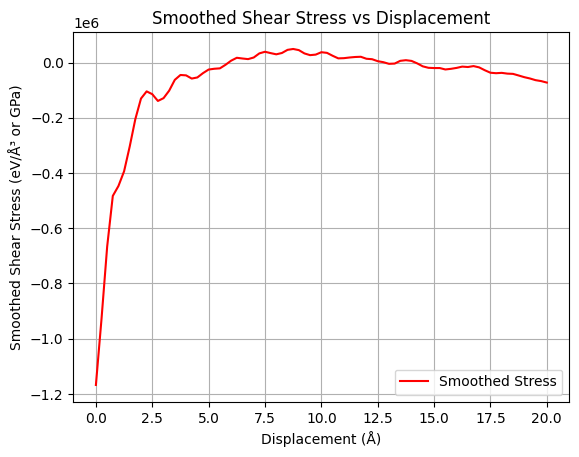

In [26]:
from scipy.ndimage import uniform_filter1d
smooth_stress = uniform_filter1d(shear_stress, size=3)

plt.plot(displacement, smooth_stress, label='Smoothed Stress', color='red')
plt.xlabel("Displacement (Å)")
plt.ylabel("Smoothed Shear Stress (eV/Å³ or GPa)")
plt.title("Smoothed Shear Stress vs Displacement")
plt.legend()
plt.grid(True)
plt.savefig("shear_stress_vs_displacement.pdf", bbox_inches='tight')
plt.show()

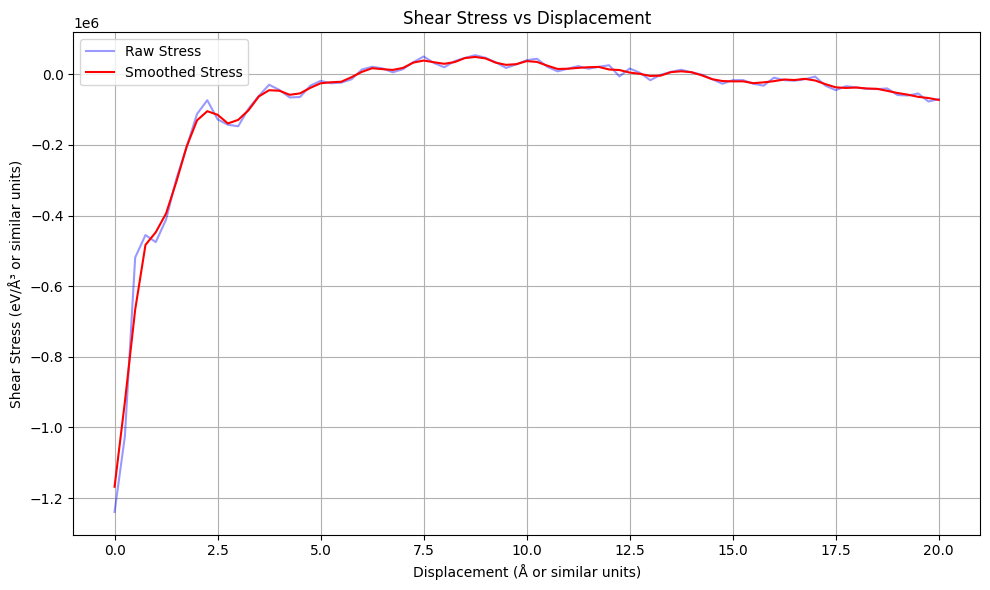

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from scipy.ndimage import uniform_filter1d

# Path to folder with dump files
folder = "."

# Function to extract timestep from filename
def extract_timestep(filename):
    match = re.search(r'dump\.Al\.shear\.(\d+)', filename)
    return int(match.group(1)) if match else -1

# List of dump files sorted by timestep
dump_files = sorted(
    [f for f in os.listdir(folder) if f.startswith("dump.Al.shear.")],
    key=extract_timestep
)

timesteps = []
shear_stress = []

for fname in dump_files:
    timestep = extract_timestep(fname)
    with open(os.path.join(folder, fname)) as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "ITEM: ATOMS" in line:
            start = i + 1
            break

    # Read sxy (which is virial[1] = c_virial[1]) at column index 11
    try:
        data = np.genfromtxt(lines[start:], usecols=11)
        if data.size > 0:
            sxy_avg = np.mean(data)
            timesteps.append(timestep)
            shear_stress.append(sxy_avg)
    except Exception as e:
        print(f"Error reading {fname}: {e}")

# Convert to numpy arrays and compute displacement
timesteps = np.array(timesteps)
displacement = 1.0 * timesteps * 0.001  # shear velocity × timestep × dt

# Smooth the stress using a moving average filter
smooth_stress = uniform_filter1d(shear_stress, size=3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(displacement, shear_stress, label='Raw Stress', color='blue', alpha=0.4)
plt.plot(displacement, smooth_stress, label='Smoothed Stress', color='red')
plt.xlabel('Displacement (Å or similar units)')
plt.ylabel('Shear Stress (eV/Å³ or similar units)')
plt.title('Shear Stress vs Displacement')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("shear_stress_vs_displacement.pdf", bbox_inches='tight')
plt.show()

In [25]:
import os
os.getcwd()

'C:\\Users\\apand\\Desktop\\LAMMPS 64-bit 2Apr2025\\Examples\\3d'